In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
class viewer:
    def __init__(self, input):
        
        self.data = input[0].view(input[0].size(0), -1).to("cpu")
        self._scaler = input[1].to("cpu")
        self._zero_point = input[2].to("cpu")
        self._n_bits = input[3]
        print(self._n_bits)
        self._repr_min = -(2 ** (self._n_bits - 1))  # "INT8" -> -128
        self._repr_max = 2 ** (self._n_bits - 1) - 1  # "INT8" -> 127

    def _quantize(self, input):
        return torch.clamp(
            torch.round(input / self._scaler) + self._zero_point,
            self._repr_min,
            self._repr_max,
        )

    def _dequantize(self, input):
        return (input - self._zero_point) * self._scaler

    def forward(self, x):
        return self._dequantize(self._quantize(x))

    def draw(self, input=None):
        input = self.data if input is None else input
        input = input.T
        plt.figure(figsize=(10, 5))
        sns.heatmap(input, cmap="viridis", cbar=True)
        plt.xlabel("Feature")
        plt.ylabel("Sample")
        plt.title("Heatmap of 64x142 data")
        plt.show()

    def iqr(self, input=None, title=None):
        input = self.data if input is None else input
        input = input.T        
        plt.figure(figsize=(25, 10))
        plt.boxplot(input, patch_artist=True)
        if title:
            plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Channel")
        
        plt.show()


4
4


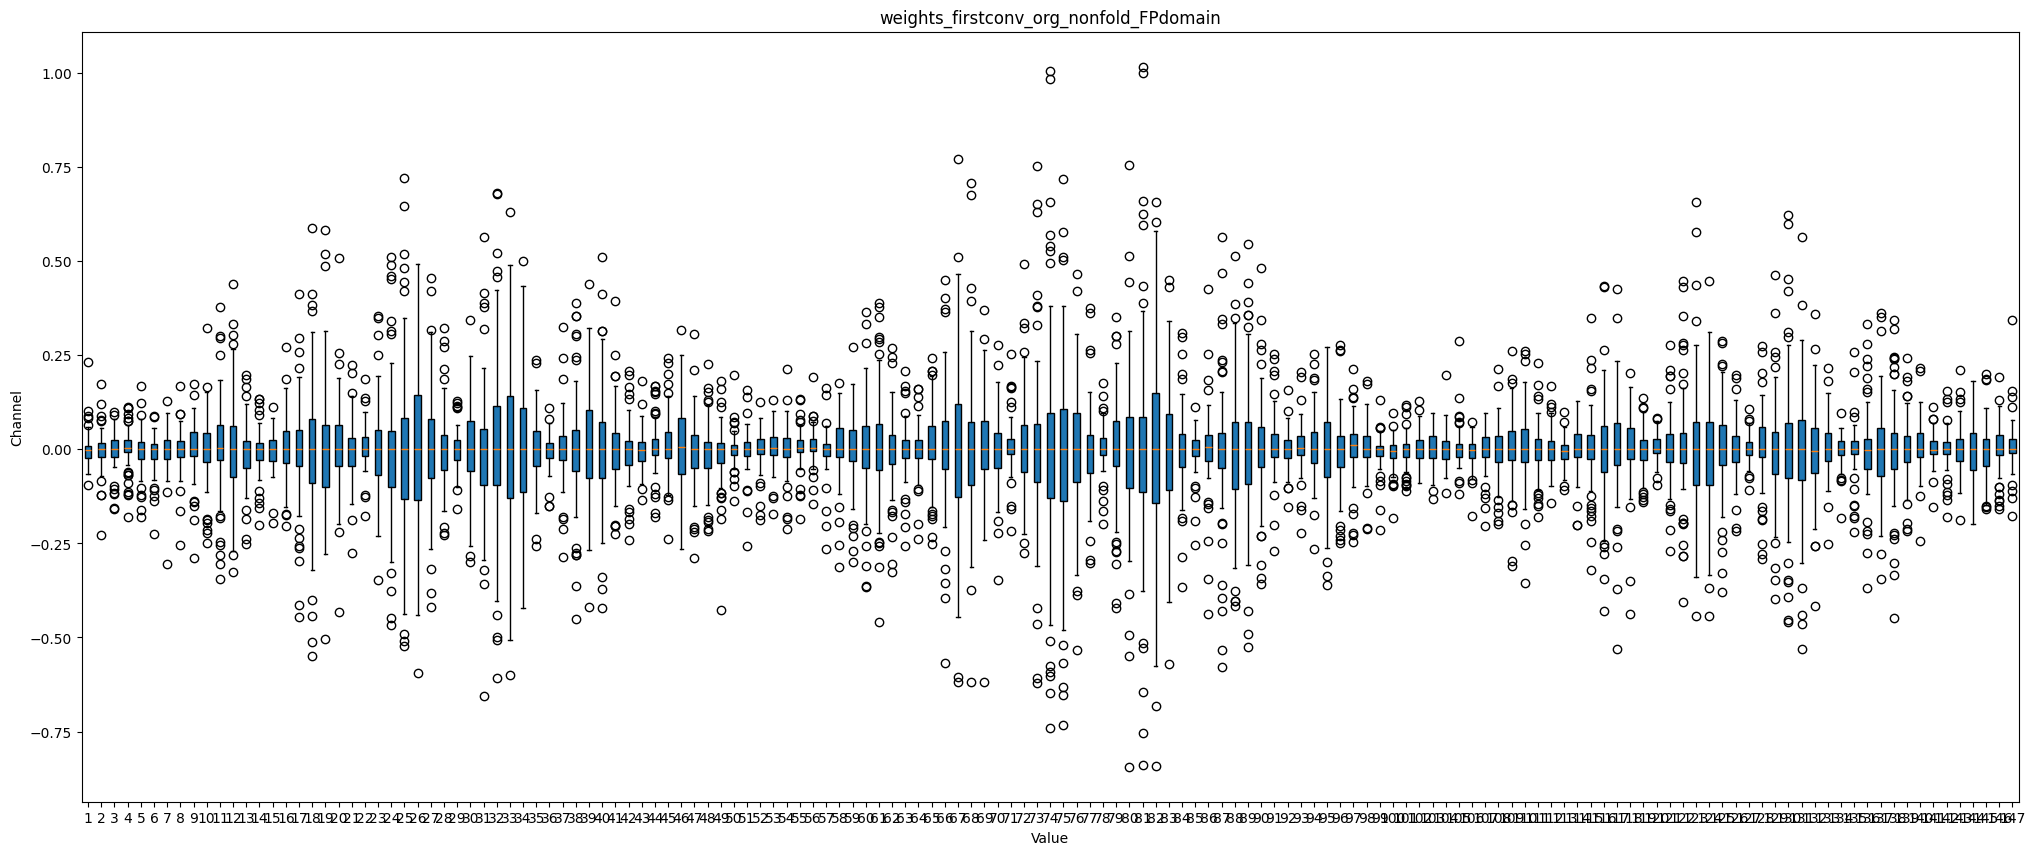

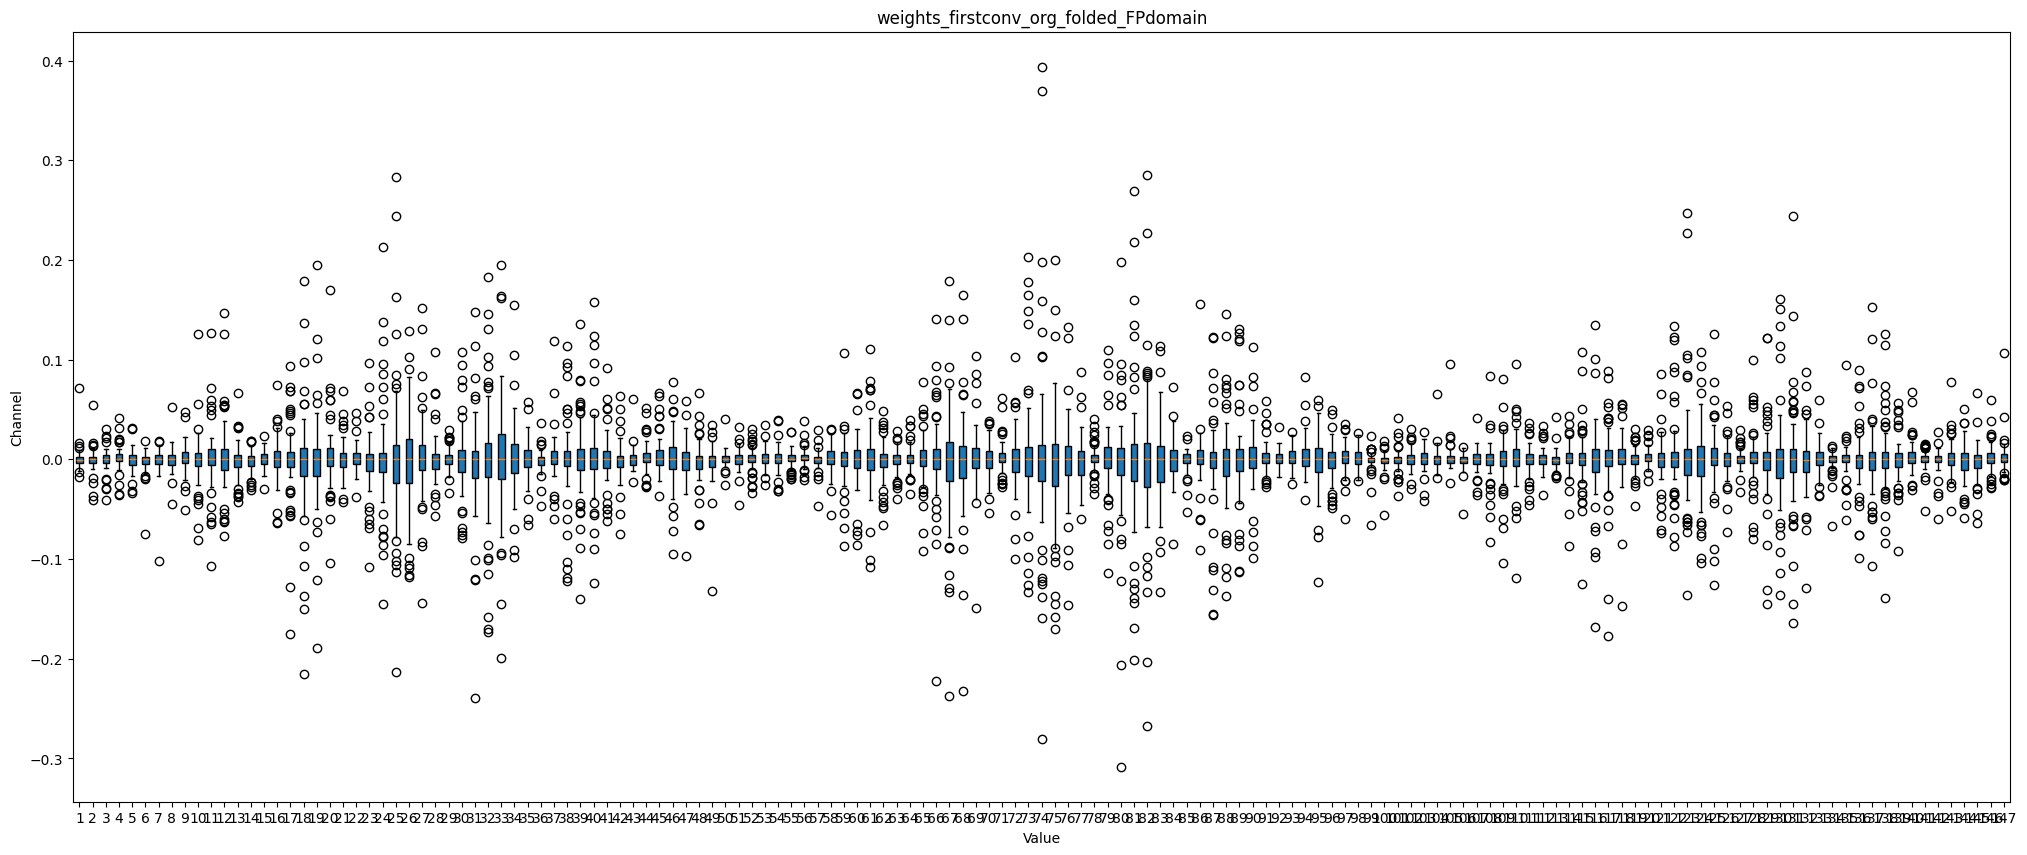

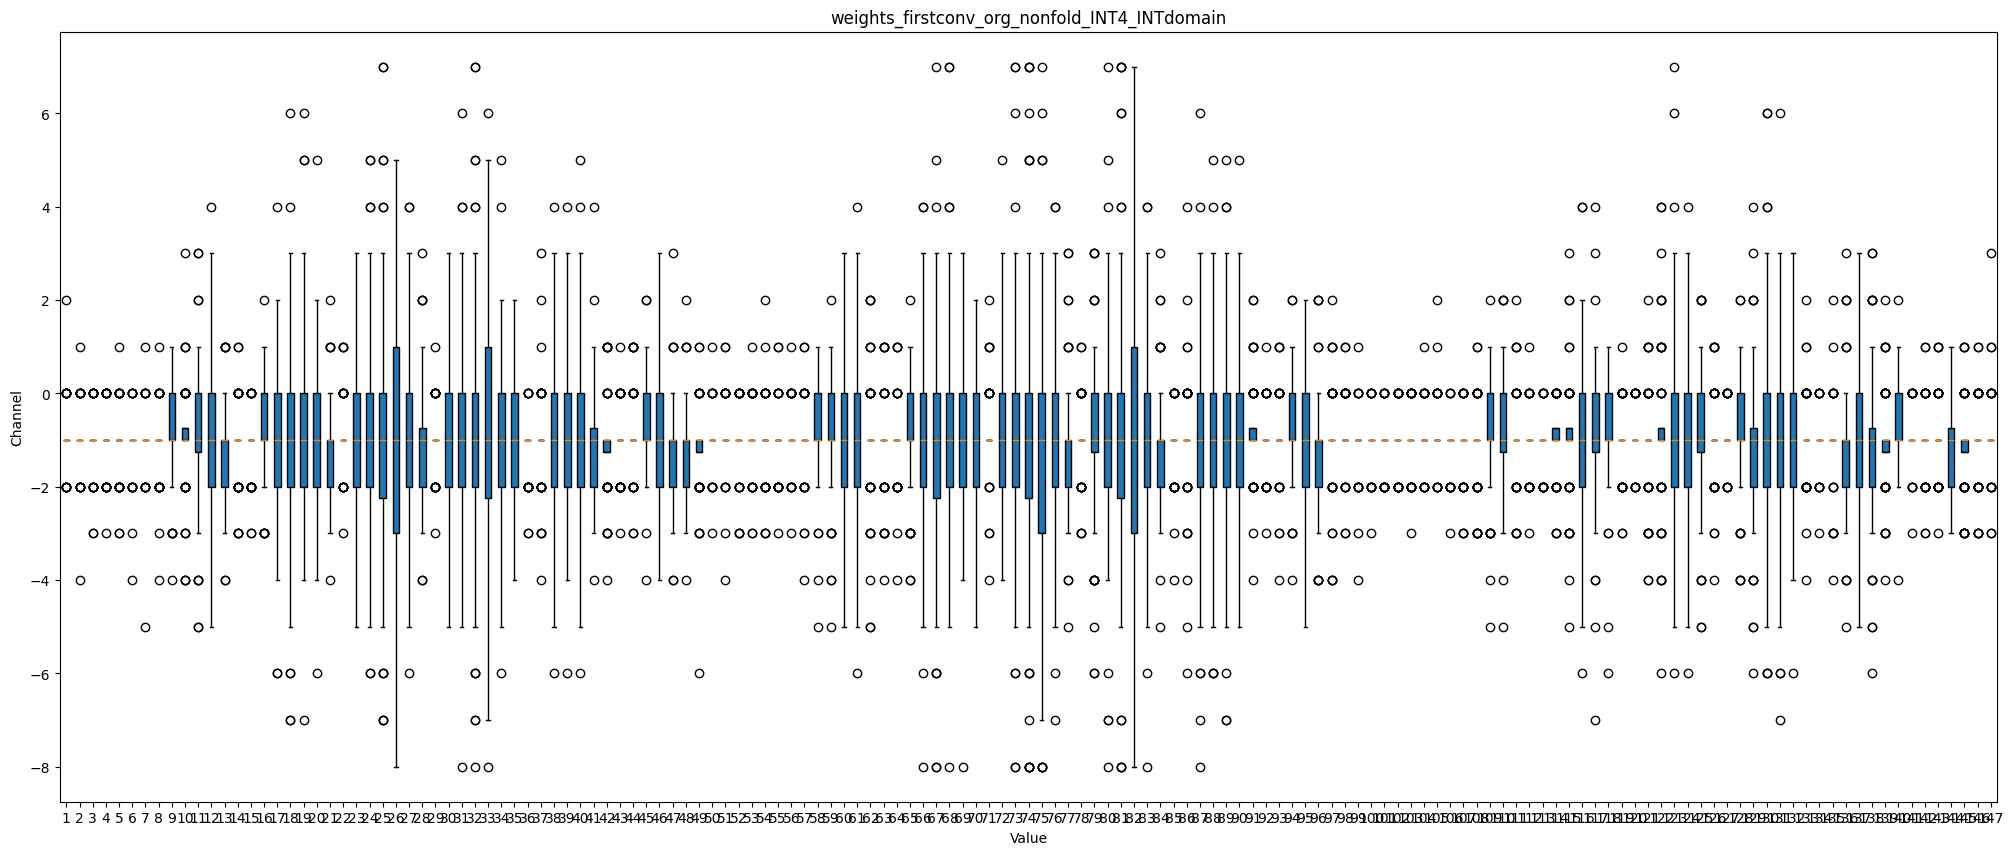

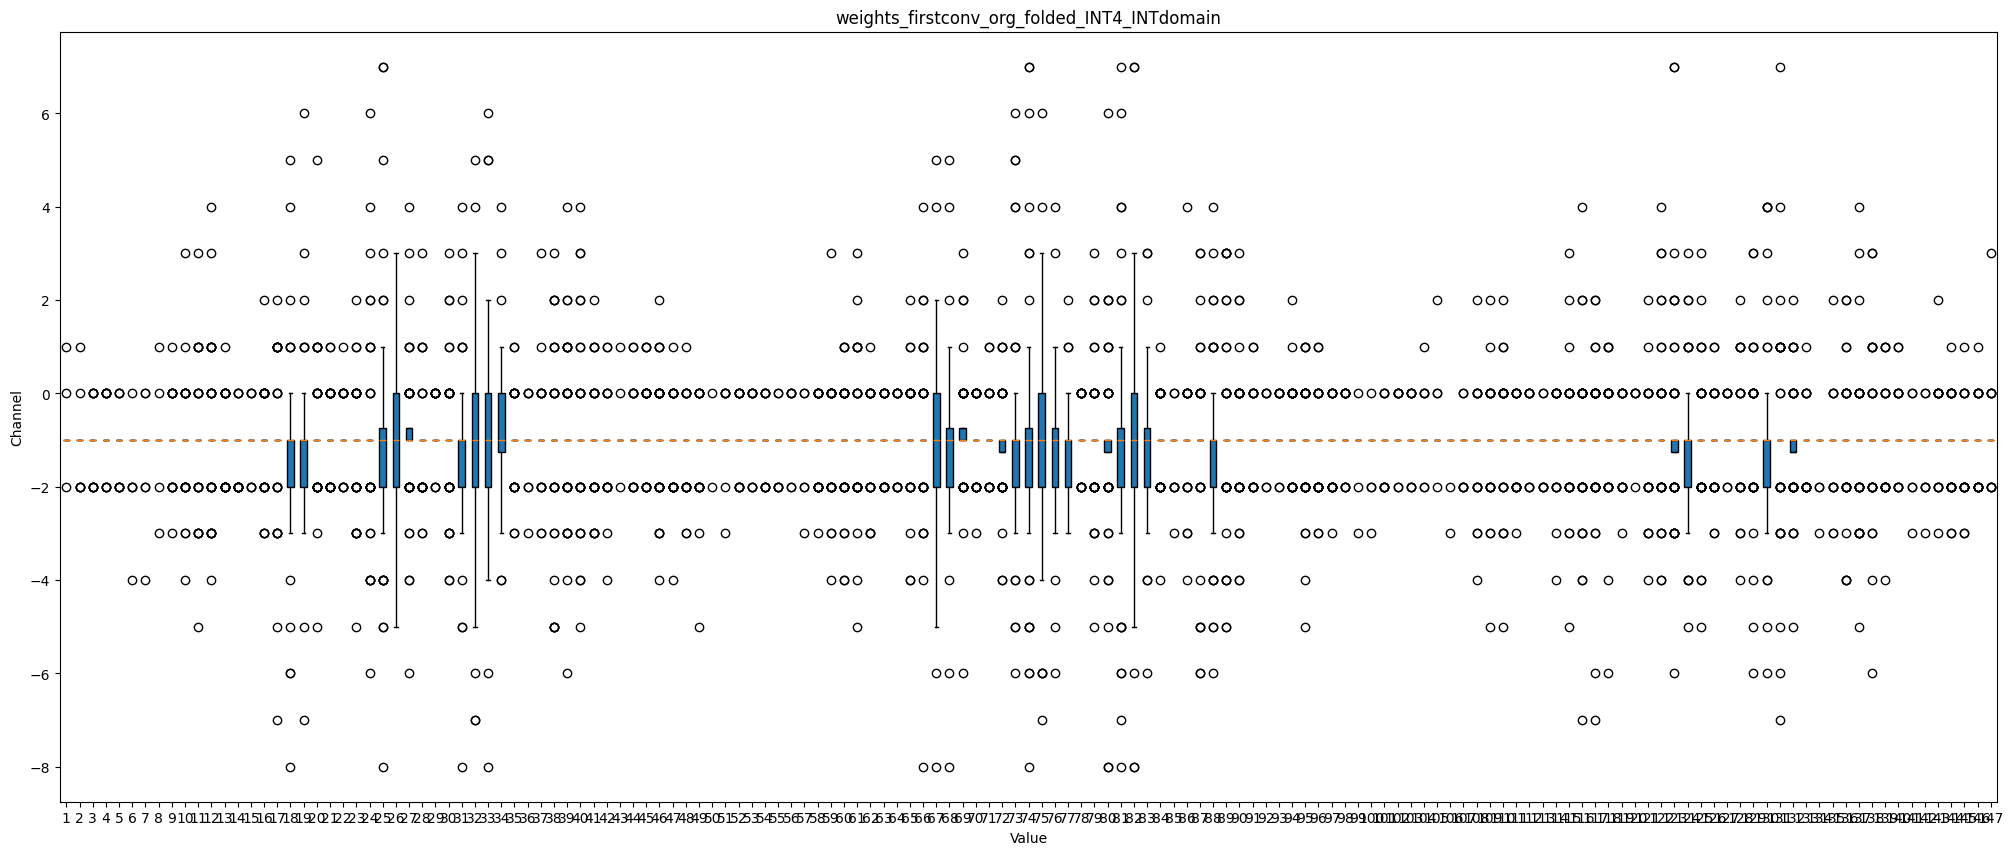

In [3]:
first_nonfold = viewer(torch.load("weights_firstconv_org_nonfold_INT4.pt"))
first_folded = viewer(torch.load("weights_firstconv_org_folded_INT4.pt"))
first_nonfold.iqr(
    first_nonfold.data, title="weights_firstconv_org_nonfold_FPdomain"
)
first_folded.iqr(first_folded.data, title="weights_firstconv_org_folded_FPdomain")
first_nonfold.iqr(first_nonfold._quantize(first_nonfold.data),title="weights_firstconv_org_nonfold_INT4_INTdomain")
first_folded.iqr(
    first_folded._quantize(first_folded.data),
    title="weights_firstconv_org_folded_INT4_INTdomain",
)


8
8


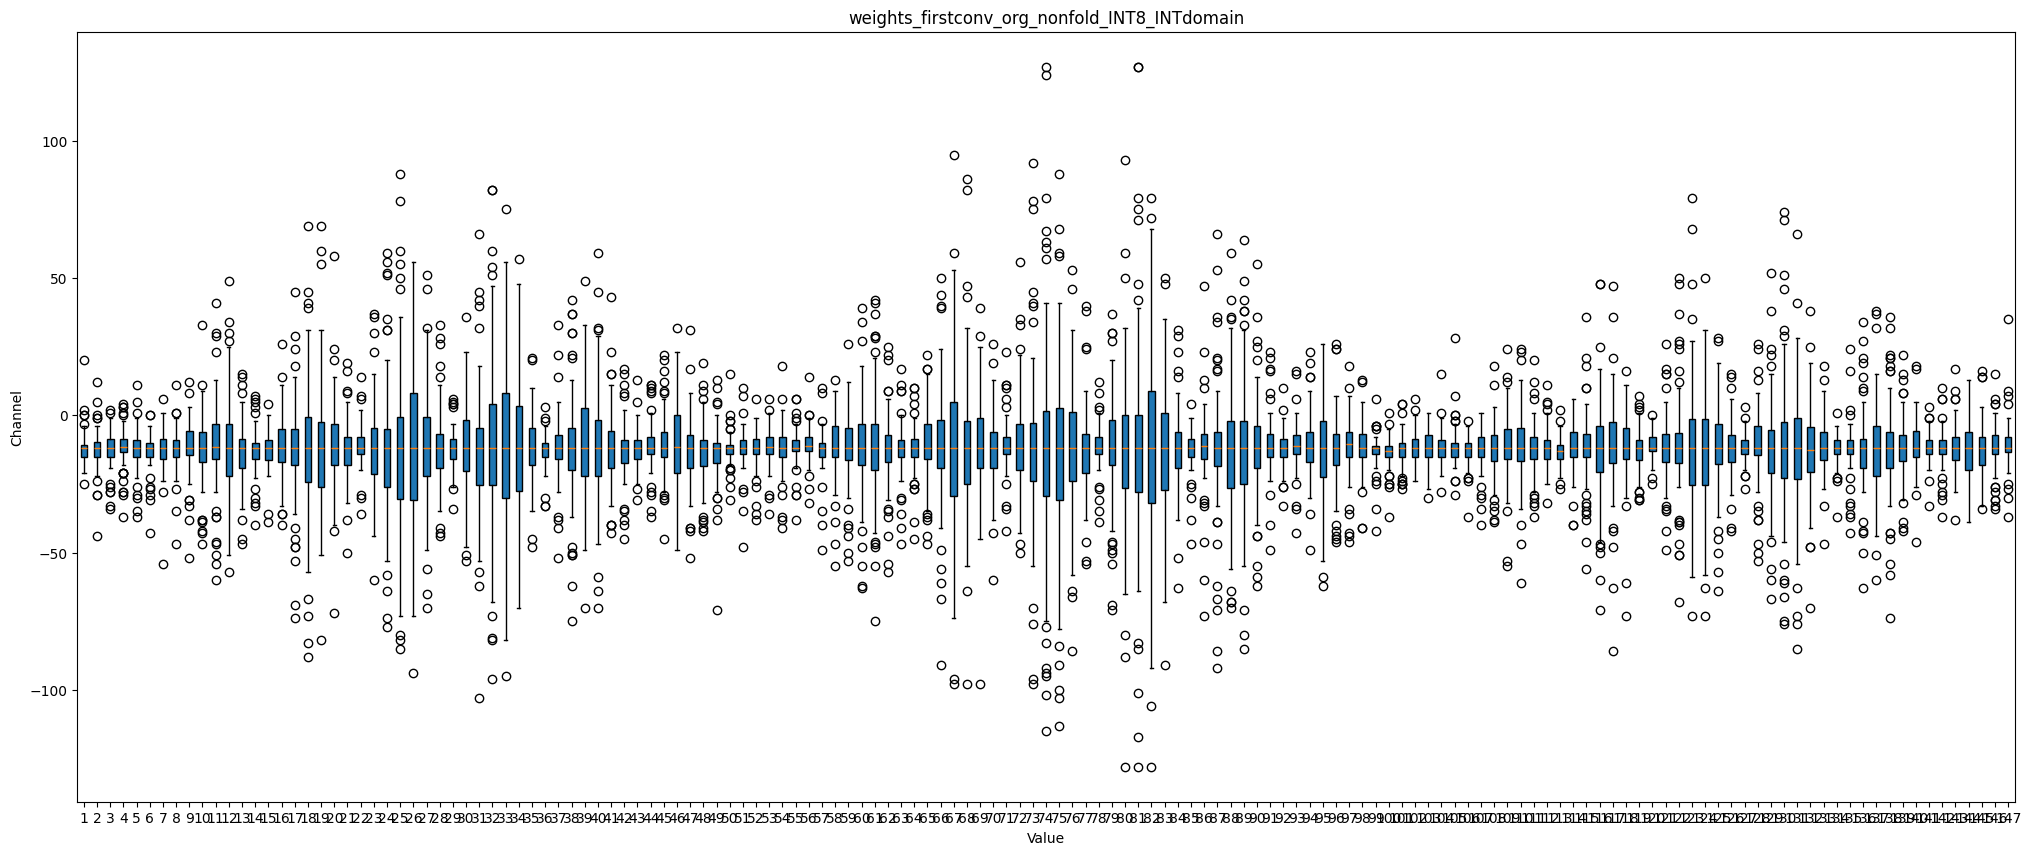

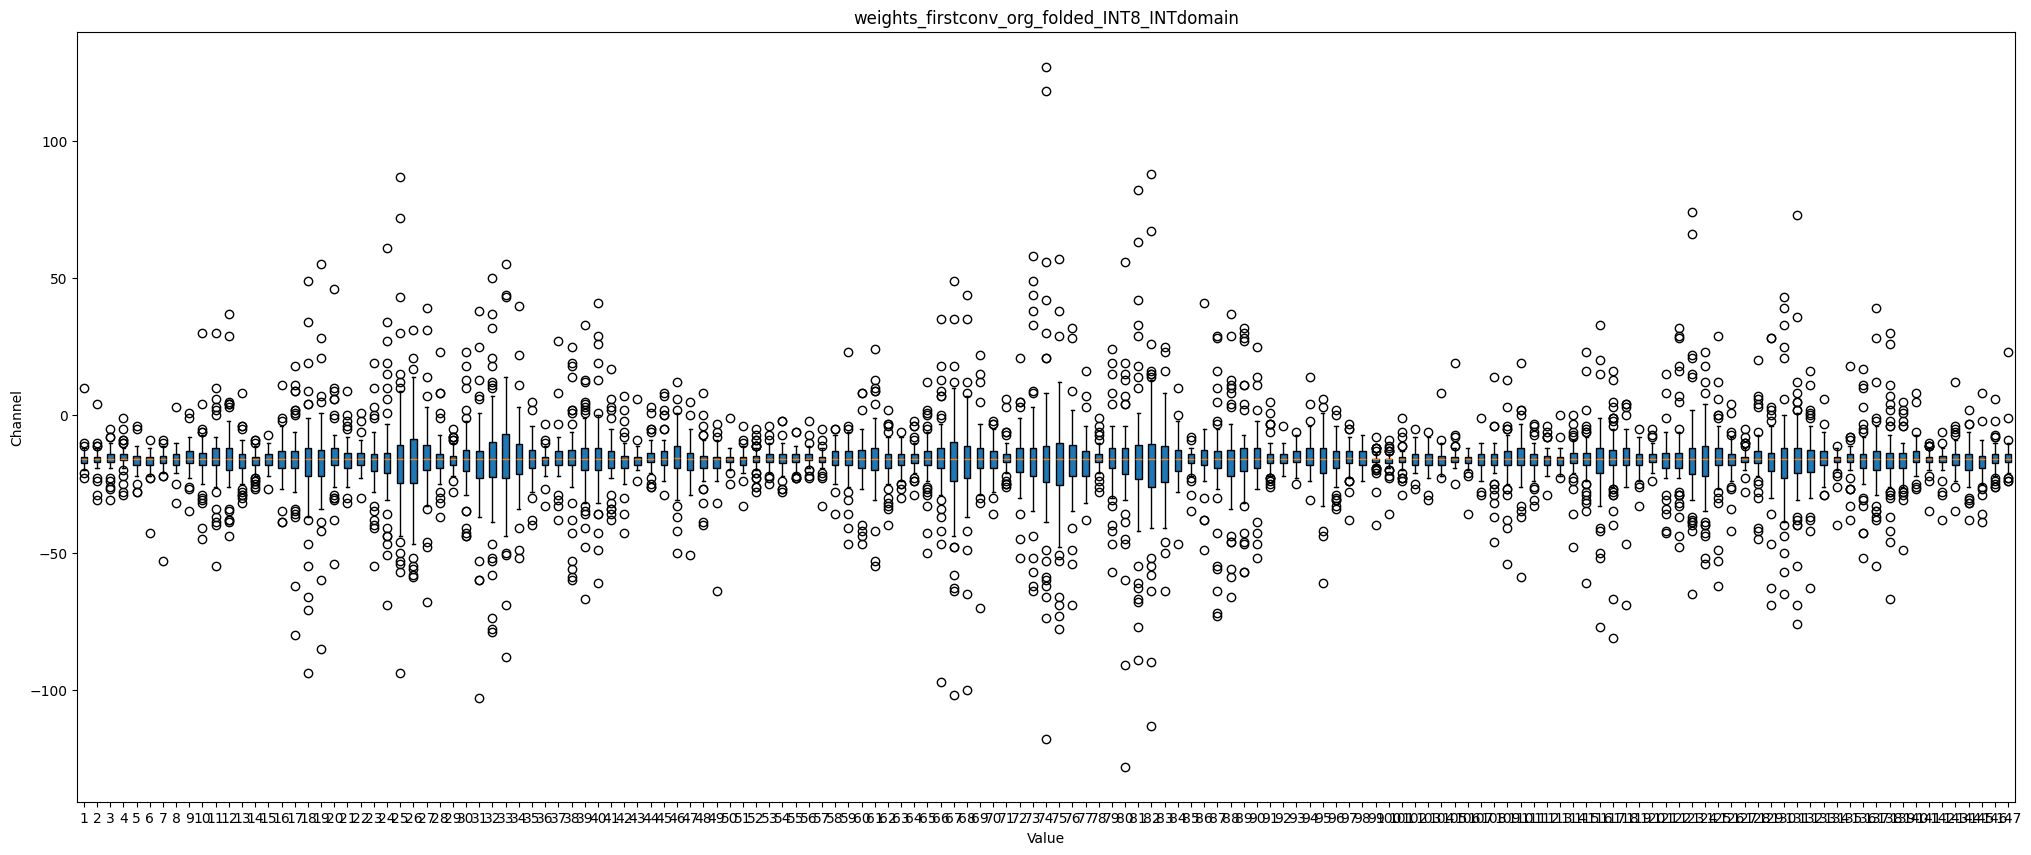

In [4]:
first_nonfold = viewer(torch.load("weights_firstconv_org_nonfold_INT8.pt"))
first_folded = viewer(torch.load("weights_firstconv_org_folded_INT8.pt"))
first_nonfold.iqr(
    first_nonfold._quantize(first_nonfold.data),
    title="weights_firstconv_org_nonfold_INT8_INTdomain",
)
first_folded.iqr(
    first_folded._quantize(first_folded.data),
    title="weights_firstconv_org_folded_INT8_INTdomain",
)
